# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [74]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

## **Loading data and preparing it for training**

In [2]:
#LOAD THE DATA
from sklearn.datasets import make_moons
from matplotlib import pyplot
import pandas as pd
from sklearn.preprocessing import StandardScaler
path = "/content/water_potability.csv"

df = pd.read_csv(path)

print(df.shape)
print(df.head())


(3276, 10)
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


# **Data cleanup**

In [3]:
# Handling missing data

df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

# Print the cleaned dataframe shape and a few rows to check
print(df.shape)
print(df.head())

(3276, 10)
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [4]:
print(df[df['Potability'] == 0].shape)
print(df[df['Potability'] == 1].shape)

(1998, 10)
(1278, 10)


In [5]:
columns_to_scale = df.columns.drop('Potability')
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df_scaled.head())

             ph  Hardness    Solids  Chloramines       Sulfate  Conductivity  \
0 -6.043133e-16  0.259195 -0.139471     0.112415  9.613574e-01      1.708954   
1 -2.289339e+00 -2.036414 -0.385987    -0.307694  3.145987e-15      2.062575   
2  6.928678e-01  0.847665 -0.240047     1.360594  3.145987e-15     -0.094032   
3  8.409504e-01  0.547651  0.000493     0.592008  6.395190e-01     -0.778830   
4  1.368569e+00 -0.464429 -0.460249    -0.363698 -6.541765e-01     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       -1.180651         1.306149  -1.286298           0  
1        0.270597        -0.638480   0.684218           0  
2        0.781117         0.001509  -1.167365           0  
3        1.255134         2.152874   0.848412           0  
4       -0.824357        -2.181599   0.138786           0  


# **Data Splitting**

In [6]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df_scaled[columns_to_scale]
y = df['Potability']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2620, 9)
X_test shape: (656, 9)
y_train shape: (2620,)
y_test shape: (656,)


# Each Memeber Defines their model Here

In [ ]:
#Model Definition by member 1
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process

In [107]:
model_rmsprop = Sequential()

# Input layer with regularization
model_rmsprop.add(Dense(256, activation='relu',
                       input_shape=(X_train.shape[1],),
                       kernel_regularizer=l2(0.005)))
model_rmsprop.add(Dropout(0.2))

# Hidden layers
model_rmsprop.add(Dense(128, activation='relu',
                       kernel_regularizer=l2(0.005)))
model_rmsprop.add(Dropout(0.2))

model_rmsprop.add(Dense(64, activation='relu',
                       kernel_regularizer=l2(0.005)))
model_rmsprop.add(Dropout(0.2))

model_rmsprop.add(Dense(32, activation='relu',
                       kernel_regularizer=l2(0.005)))

# Output layer
model_rmsprop.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
optimizer = RMSprop(learning_rate=0.0004)
model_rmsprop.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Early stopping
es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   restore_best_weights=True)

# Train the model
history = model_rmsprop.fit(X_train, y_train,
                           validation_data=(X_test, y_test),
                           epochs=100,
                           batch_size=32,
                           verbose=1,
                           callbacks=[es])

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5760 - loss: 2.1028 - val_accuracy: 0.6280 - val_loss: 1.6932
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6253 - loss: 1.5954 - val_accuracy: 0.6418 - val_loss: 1.3043
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6028 - loss: 1.2480 - val_accuracy: 0.6433 - val_loss: 1.0421
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6256 - loss: 1.0079 - val_accuracy: 0.6570 - val_loss: 0.8870
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6295 - loss: 0.8743 - val_accuracy: 0.6646 - val_loss: 0.7973
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6472 - loss: 0.7973 - val_accuracy: 0.6692 - val_loss: 0.7502
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6691 - loss: 0.7527 - val_accuracy: 0.6829 - val_loss: 0.7280
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6662 - loss: 0.7331 - val_accuracy: 0.6845 - 

# **Error analysis**

In [109]:
# Let's import some libraries

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))

Evaluating RMSProp Model:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


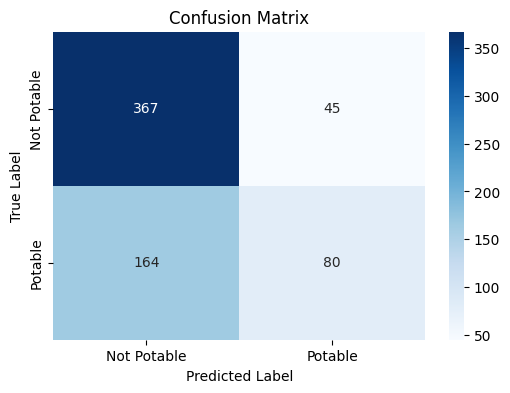

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       412
           1       0.64      0.33      0.43       244

    accuracy                           0.68       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656



In [110]:
print("Evaluating RMSProp Model:")
evaluate_model(model_rmsprop, X_test, y_test)

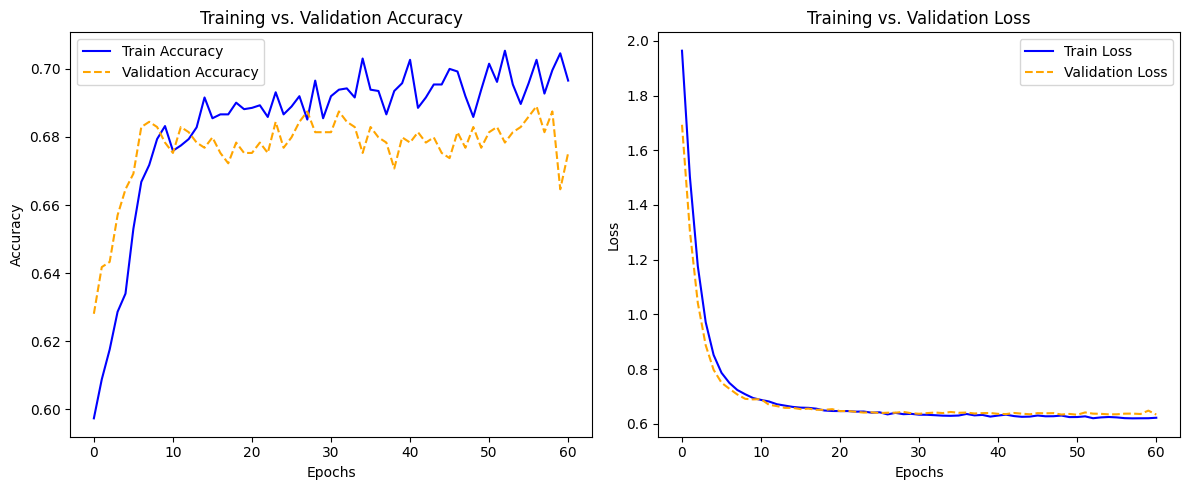

In [111]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='dashed')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs. Validation Accuracy")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='dashed')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the results
plot_training_history(history)